# Ejercicio de Olympic Games (60-61-62)

## JOINS DE DATASETS

In [2]:
import pandas as pd

In [3]:
file_path = '../data/athletes/'
main_dataset = pd.read_csv(file_path + 'Medals.csv', encoding='ISO-8859-1')

In [4]:
main_dataset.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


Lo que vamos a hacer es seleccionar información referentes al dataset.

El primer caso va a seleccionar los athletas unicos:

In [5]:
unique_athletes = main_dataset['Athlete'].unique().tolist()

In [6]:
len(unique_athletes)

6956

In [7]:
main_dataset.shape

(8618, 8)

Ahora, lo que vamos a cargar son los paises a los que representa cada athleta:

In [8]:
data_country = pd.read_csv(file_path+'Athelete_Country_Map.csv', encoding='ISO-8859-1')

In [9]:
data_country.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [10]:
data_country.shape

(6970, 2)

In [11]:
data_country[data_country['Athlete'] == 'Aleksandar Ciric']

,Athlete,Country
1029,Aleksandar Ciric,Serbia
1086,Aleksandar Ciric,Serbia and Montenegro


In [12]:
data_sports = pd.read_csv(file_path+'Athelete_Sports_Map.csv', encoding='ISO-8859-1')

In [13]:
data_sports.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [14]:
data_sports.shape

(6975, 2)

In [15]:
data_sports[(data_sports['Athlete'] == 'Chen Jing') | (data_sports['Athlete'] == 'Richard Thompson' )| (data_sports['Athlete'] == 'Matt Ryan')]

,Athlete,Sport
528,Richard Thompson,Athletics
1308,Chen Jing,Volleyball
1419,Chen Jing,Table Tennis
2727,Matt Ryan,Rowing
5003,Matt Ryan,Equestrian
5691,Richard Thompson,Baseball


Ahora lo que vamos a hacer es cruzar los datasets cargados.

In [16]:
data_main_country = pd.merge(left= main_dataset, right=data_country,
                             left_on='Athlete', right_on='Athlete')

In [17]:
data_main_country.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [18]:
data_main_country.shape

(8657, 9)

In [19]:
data_main_country[data_main_country['Athlete'] == 'Aleksandar Ciric']

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1503,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1504,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia and Montenegro
1505,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1506,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia and Montenegro
1507,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia
1508,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia and Montenegro


Se ha duplicado la información debido a la realización de un INNER-JOIN. Por lo tanto, antes de llevar a cabo el merge, debemos eliminar los duplicados:

In [20]:
data_country_non_dp = data_country.drop_duplicates(subset='Athlete')

In [21]:
data_country_non_dp

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States
...,...,...
6965,Olena Sadovnycha,Ukraine
6966,Kateryna Serdiuk,Ukraine
6967,Wietse van Alten,Netherlands
6968,Sandra Wagner-Sachse,Germany


In [22]:
len(data_country_non_dp) == len(unique_athletes)

True

In [23]:
data_main_country = pd.merge(left= main_dataset, right=data_country_non_dp,
                             left_on='Athlete', right_on='Athlete')

In [24]:
data_main_country.shape

(8618, 9)

In [25]:
data_sport_non_dp = data_sports.drop_duplicates(subset='Athlete')

In [26]:
data_sport_non_dp.shape

(6956, 2)

In [27]:
data_final = pd.merge(left= data_main_country, right=data_sport_non_dp,
                             left_on='Athlete', right_on='Athlete')

In [28]:
data_final.shape

(8618, 10)

In [29]:
data_final.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


## Cruzar datos usando JOINS

### Tipos de Joins

#### Inner Join

- Devuelve un data frame con las filas que tienen valor tanto en el primero como en el segundo data frame que estamos uniendo
- El número de filas será igual al número de filas comunes que tengas ambos data sets
- Data Set A tiene 60 filas
- Data Set B tiene 50 filas
- Ambos comparten 30 filas
- Entonces A Inner Join B tendrá 30 filas
- En términos de teoría de conjuntos, se trata de la intersección de los dos conjuntos

In [30]:
from IPython.display import Image

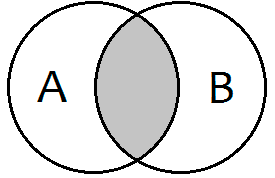

In [31]:
Image (filename='resources/inner-join.png')

#### Left Join

Devuelve un data frame con las filas que tuvieran valor en el dataset de la izquierda, sin importar si tienen correspondencia en el de la derecha o no.
Las filas del data frame final que no correspondan a ninguna fila del data frame derecho, tendrán NAs (valores no definidos) en las columnas del data frame derecho.
- El número de filas será igual al número de filas del data frame izquierdo
- Data Set A tiene 60 filas
- Data Set B tiene 50 filas
- Entonces A Left Join B tendrá 60 filas
En términos de teoría de conjuntos, se trata del propio data set de la izquierda quien, además tiene la intersección en su interior.

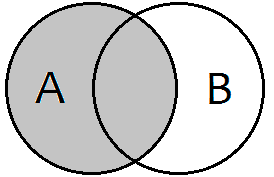

In [32]:
Image (filename='resources/left-join.png')

#### Right Join
Devuelve un data frame con las filas que tuvieran valor en el dataset de la derecha, sin importar si tienen correspondencia en el de la izquierda o no.
Las filas del data frame final que no correspondan a ninguna fila del data frame izquierdo, tendrán NAs en las columnas del data frame izquierdo.
- El número de filas será igual al número de filas del data frame derecho
- Data Set A tiene 60 filas
- Data Set B tiene 50 filas
- Entonces A Right Join B tendrá 50 filas
En términos de teoría de conjuntos, se trata del propio data set de la derecha quien, además tiene la intersección en su interior.

#### Outer Join
Devuelve un data frame con todas las filas de ambos, reemplazando las ausencias de uno o de otro con NAs en la región específica..
Las filas del data frame final que no correspondan a ninguna fila del data frame derecho (o izquierdo), tendrán NAs en las columnas del data frame derecho (o izquierdo).
- El número de filas será igual al máximo número de filas de ambos data frames
- Data Set A tiene 60 filas
- Data Set B tiene 50 filas
- Ambos comparten 30 filas
- Entonces A Outer Join B tendrá 60 + 50 - 30 = 80 filas
En términos de teoría de conjuntos, se trata de la unión de conjuntos.